In [1]:
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import inspect
%matplotlib inline
from ipywidgets import interact
import MyClassAndFun as MCF
from sklearn.preprocessing import PowerTransformer

In [2]:
df=pd.read_csv('transformed__dumm_train.csv')
df_disp=pd.read_csv('transformed_train.csv')

In [3]:
mapping = {1:"Standard", 0:"Bad", 2:"Good"}
df_disp['credit_mix']=df_disp['credit_mix'].replace(mapping)
mapping1 = {1:"Standard", 0:"Poor", 2:"Good"}
df_disp['credit_score']=df_disp['credit_score'].replace(mapping1)

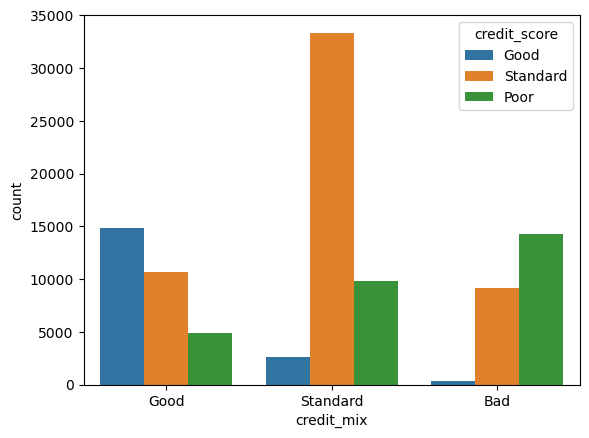

In [4]:
fig=sns.countplot(data=df_disp, x="credit_mix", hue="credit_score")
fig.get_figure().savefig("output.png")

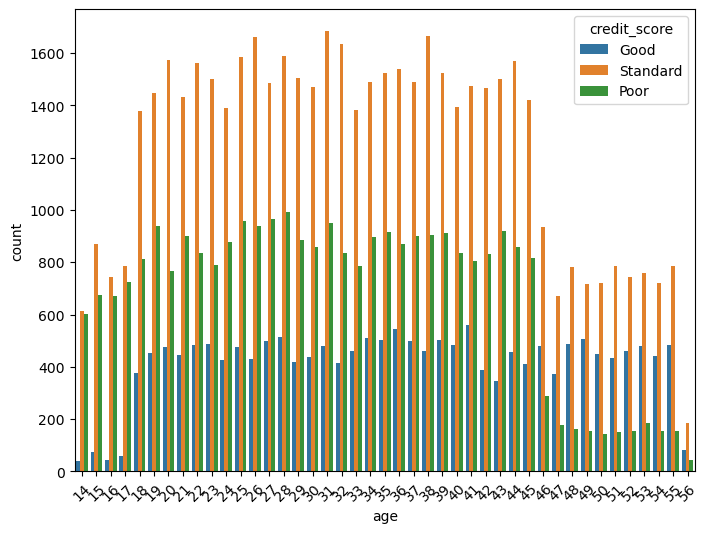

In [5]:
fig = plt.figure(figsize=(8, 6))
sns.countplot(data=df_disp, x="age", hue="credit_score")
plt.xticks(rotation=45)  
# fig.get_figure().savefig("output.png")
plt.show()

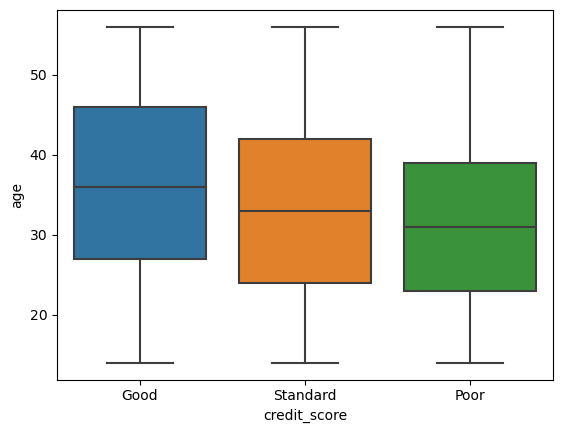

In [6]:
fig=sns.boxplot(x="credit_score", y='age', data=df_disp)
fig.get_figure().savefig("output.png")

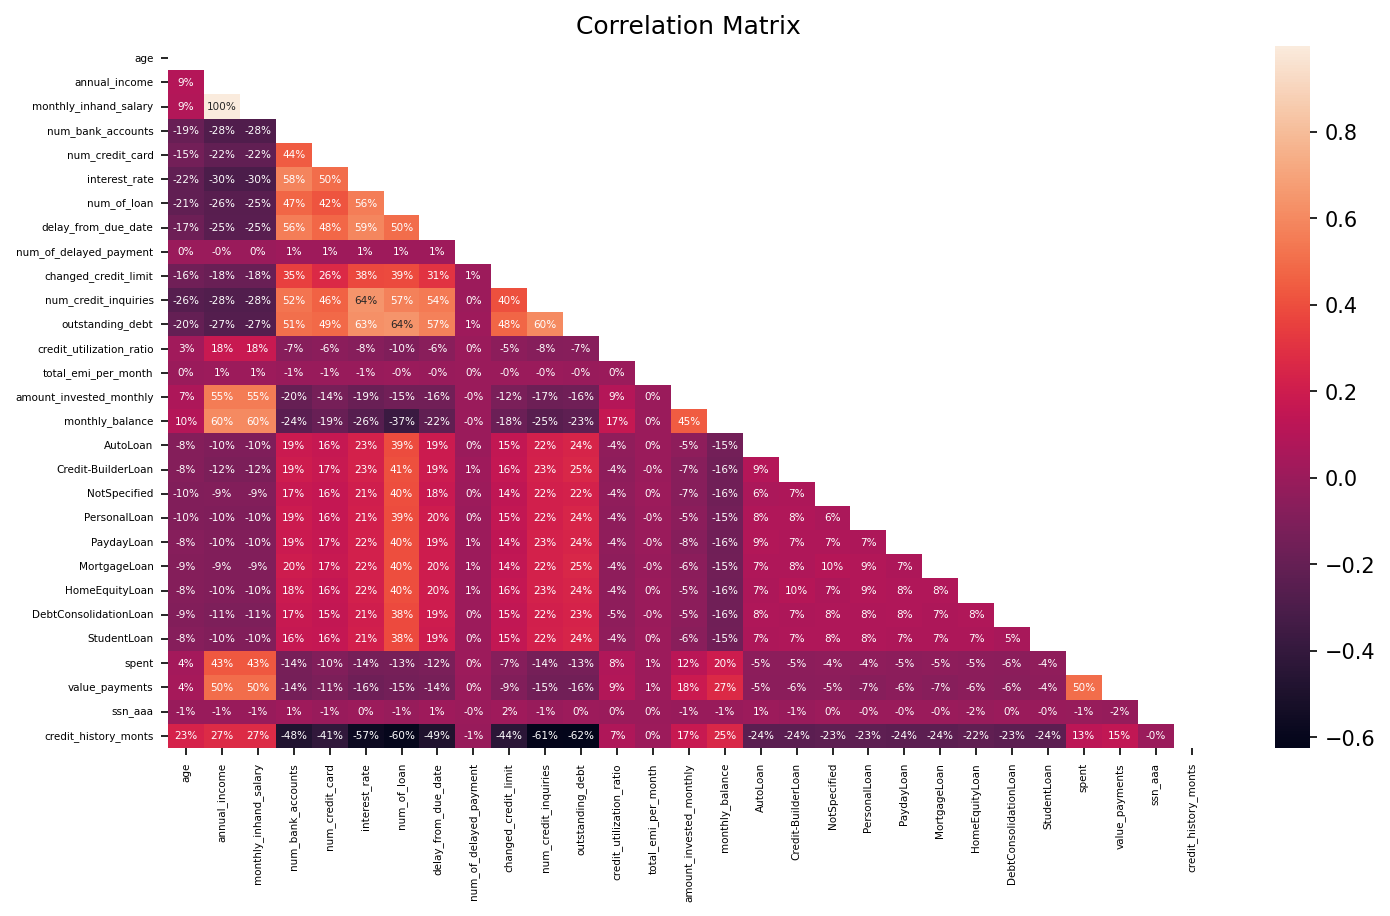

In [7]:
corr = df_disp.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

fig = plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(corr, annot=True, mask=mask, fmt=".0%", annot_kws={"size":5})
plt.grid(False)
plt.tick_params(axis="both", labelsize=5)
plt.tight_layout()
plt.title("Correlation Matrix")
plt.show()
fig.get_figure().savefig("output.png")

In [8]:
MCF.display_dataframe_summary(df_disp)

First 2 rows:


,id,customer_id,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,...,MortgageLoan,HomeEquityLoan,DebtConsolidationLoan,StudentLoan,spent,value_payments,ssn_aaa,credit_history_monts,credit_score,credit_mix
0,0x1602,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,...,0,1,0,0,1,1,821,265.0,Good,Good
1,0x1603,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3,4,3,...,0,1,0,0,1,1,821,265.0,Good,Good


__________________________________________________
Last 2 rows:


,id,customer_id,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,...,MortgageLoan,HomeEquityLoan,DebtConsolidationLoan,StudentLoan,spent,value_payments,ssn_aaa,credit_history_monts,credit_score,credit_mix
99998,0x25fec,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4,6,7,...,0,0,0,1,1,2,78,381.0,Standard,Good
99999,0x25fed,CUS_0x942c,August,25,Mechanic,39628.99,3359.415833,4,6,7,...,0,0,0,1,1,2,78,382.0,Poor,Good


__________________________________________________
Shape (number of rows and columns):


(100000, 36)

__________________________________________________
DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   age                       100000 non-null  int64  
 4   occupation                100000 non-null  object 
 5   annual_income             100000 non-null  float64
 6   monthly_inhand_salary     100000 non-null  float64
 7   num_bank_accounts         100000 non-null  int64  
 8   num_credit_card           100000 non-null  int64  
 9   interest_rate             100000 non-null  int64  
 10  num_of_loan               100000 non-null  int64  
 11  delay_from_due_date       100000 non-null  int64  
 12  num_of_delayed_payment    1

None

__________________________________________________
Summary of key statistical characteristics for numeric columns:


,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,PersonalLoan,PaydayLoan,MortgageLoan,HomeEquityLoan,DebtConsolidationLoan,StudentLoan,spent,value_payments,ssn_aaa,credit_history_monts
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.274560,50505.123449,4198.490149,5.368160,5.532800,14.53208,3.532880,21.095040,29.714430,10.394631,...,0.311040,0.319440,0.313600,0.314000,0.31040,0.31040,0.542720,0.889120,499.962480,221.156971
std,10.764438,38299.422093,3187.491752,2.592552,2.067657,8.74133,2.446356,14.822802,218.024166,6.511296,...,0.462921,0.466262,0.463958,0.464119,0.46266,0.46266,0.498174,0.806196,290.825663,99.065578
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,24.000000,19342.972500,1626.761667,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.500000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,245.000000,146.000000
50%,33.000000,36999.705000,3095.978333,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.340000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,1.000000,500.000000,221.000000
75%,42.000000,71683.470000,5961.637500,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.672500,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,2.000000,755.250000,301.000000
max,56.000000,179987.280000,15204.633333,10.000000,11.000000,34.00000,9.000000,67.000000,4397.000000,29.980000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,2.000000,999.000000,404.000000


__________________________________________________
Summary of statistics for columns with data type "object":


,id,customer_id,month,occupation,payment_of_min_amount,credit_score,credit_mix
count,100000,100000,100000,100000,100000,100000,100000
unique,100000,12500,8,15,2,3,3
top,0x1602,CUS_0xd40,January,Lawyer,Yes,Standard,Standard
freq,1,8,12500,7096,59432,53174,45848


In [ ]:
@interact(var=df.columns,hue=df.columns)
def plot(var,hue):
#     _=sns.displot(df[var])
    _=sns.displot(data=df, x=var, hue=hue, multiple="stack")

In [ ]:
df_types = pd.DataFrame(df.dtypes, columns=['Data_Type'])

# Group by data types and count the columns
grouped = df_types['Data_Type'].value_counts()

# Display the grouped data
print(grouped)

In [ ]:
int_col_list= df_types[df_types.Data_Type=='int64'].index

In [ ]:
float_col_list= df_types[df_types.Data_Type=='float64'].index

In [ ]:
@interact(var=float_col_list)
def plot(var):
    _=sns.boxplot(x=var,data=df)


In [ ]:
@interact(var=int_col_list)
def plot(var):
    _=sns.boxplot(x=var,data=df)


In [ ]:

# plt.figure(figsize = (5,10))
# sns.pairplot(df)
# plt.title('var')
# plt.savefig('var.jpg',dpi=300)
# plt.show()


In [ ]:


# plt.figure(figsize = (50,100))
# sns.heatmap(df.corr(),annot=True)
# plt.title('cor')
# plt.savefig('cor.jpg',dpi=300)
# plt.show()


In [ ]:
plt.figure(figsize = (5,10))
sns.heatmap(df.corr()[['credit_score']].sort_values(by='credit_score', ascending=False), annot = True)
plt.title('credit score cor')
# plt.savefig('credit score cor.jpg',dpi=300)
plt.show()


In [ ]:

plt.figure(figsize = (5,10))
sns.pairplot(df,hue="credit_score")
plt.title('var')
plt.savefig('var_hue.jpg',dpi=300)
plt.show()


# VIF

In [ ]:
list(df.columns[df.columns.isin(['credit_score','monthly_inhand_salary'])==False])


In [ ]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif


In [ ]:
X_col = list(df.columns[df.columns.isin(['credit_score','monthly_inhand_salary'])==False])
# X_col


In [ ]:
# features to consider removing
considered_features = X_col


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)


In [ ]:
df.drop(['monthly_inhand_salary'], axis=1, inplace=True)

In [ ]:
X_col

In [ ]:
for var in X_col:
    MCF.targe_plot(df,var)

In [ ]:
transform_var_list=['age','annual_income','interest_rate','delay_from_due_date','changed_credit_limit',
                    'outstanding_debt','credit_utilization_ratio','credit_history_monts',
                    'num_of_delayed_payment','total_emi_per_month','amount_invested_monthly','monthly_balance',]

In [ ]:

pt=PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
af_pt_df=df.copy()
for i in transform_var_list:
    af_pt_df[i]=pt.fit_transform(df[[i]])
for var in X_col:
    MCF.targe_plot(af_pt_df,var)    